In [1]:
%matplotlib inline
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
sem_df = pd.read_csv('../data/semmedVER30_A.csv')

/home/mmayers/software/anaconda3/envs/integrate/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2723: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
print('Rows: {:,}'.format(sem_df.shape[0]))
print('Cols: {}'.format(sem_df.shape[1]))

Rows: 89,173,359
Cols: 12


In [4]:
sem_df.head()

,PREDICATION_ID,SENTENCE_ID,PMID,PREDICATE,SUBJECT_CUI,SUBJECT_NAME,SUBJECT_SEMTYPE,SUBJECT_NOVELTY,OBJECT_CUI,OBJECT_NAME,OBJECT_SEMTYPE,OBJECT_NOVELTY
0,61,128,14420371,ISA,C0026879,Mutagens,hops,1,C0220806,Chemicals,chem,1
1,62,116,5659339,PART_OF,C0017725,Glucose,bacs,1,C0022378,jejunum,bpoc,1
2,63,146,12255310,PROCESS_OF,C0006147,Breast Feeding,orgf,1,C0020114,Human,humn,1
3,64,170,12305488,TREATS,C0279494,Oestrogen therapy,topp,1,C0043210,Woman,popg,1
4,65,116,5659339,PROCESS_OF,C0232338,Blood flow,orgf,1,C0012984,Canis familiaris,mamm,1


# Predicates

In [5]:
preds = sem_df['PREDICATE'].value_counts()

In [6]:
len(preds)

68

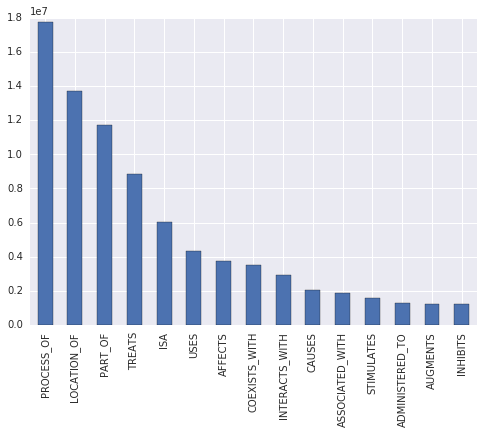

In [8]:
preds[:15].plot(kind='bar');

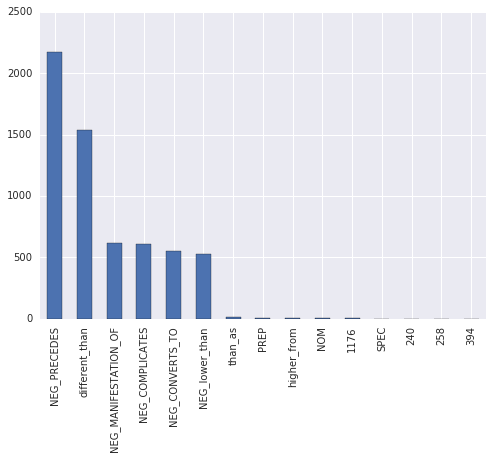

In [9]:
preds[-15:].plot(kind='bar');

In [9]:
sem_df.query('PREDICATE == "1176"')

,PREDICATION_ID,SENTENCE_ID,PMID,PREDICATE,SUBJECT_CUI,SUBJECT_NAME,SUBJECT_SEMTYPE,SUBJECT_NOVELTY,OBJECT_CUI,OBJECT_NAME,OBJECT_SEMTYPE,OBJECT_NOVELTY
78562985,78924979,136605831,11116842,1176,C0024485,Magnetic Resonance Imaging,diap,1,1333|Arthroscopy,0|diap,0,1
78562986,78924980,136605831,11116842,1176,C0024485,Magnetic Resonance Imaging,diap,1,1333|Diagnosis,0|hlca,0,1


    mysql> SELECT * FROM PREDICATION where PREDICATION_ID=78924979;
    +----------------+-------------+----------+-----------+-------------+----------------------------+-----------------+-----------------+------------------+-------------+----------------+----------------+
    | PREDICATION_ID | SENTENCE_ID | PMID     | PREDICATE | SUBJECT_CUI | SUBJECT_NAME               | SUBJECT_SEMTYPE | SUBJECT_NOVELTY | OBJECT_CUI       | OBJECT_NAME | OBJECT_SEMTYPE | OBJECT_NOVELTY |
    +----------------+-------------+----------+-----------+-------------+----------------------------+-----------------+-----------------+------------------+-------------+----------------+----------------+
    |       78924979 |   136605831 | 11116842 | 1176      | C0024485    | Magnetic Resonance Imaging | diap            |               1 | 1333|Arthroscopy | 0|diap      | 0              |              1 |
    +----------------+-------------+----------+-----------+-------------+----------------------------+-----------------+-----------------+------------------+-------------+----------------+----------------+
    1 row in set (0.00 sec)

# Sem-Types

Semtypes are abbreviated, so need to get mappings to true name.  
Examining the length of the map file, there should be 133 semtypes.

### Semmtypes abbreviation mappings

In [10]:
abbv_to_type = dict()
with open('../SemanticTypes_2013AA.txt') as fin:
    for line in fin:
        lspt = line.split('|')
        abbv_to_type[lspt[0]] = lspt[-1]
type_to_abbv = {v:k for k, v in abbv_to_type.items()}

Semtypes also have a supertype.   
The mapping file has this structure:

    ANAT|Anatomy|T017|Anatomical Structure

### Semtype supertypes mappings

In [11]:
abbv_to_super = dict()
with open('../SemGroups_2013.txt') as fin:
    for line in fin:
        lspt = line.split('|')
        abbv_to_super[type_to_abbv[lspt[-1]]] = lspt[1]

### See what sem_types exist

In [12]:
sem_df['SUBJECT_SEMTYPE'].nunique()

133

In [13]:
sem_df['OBJECT_SEMTYPE'].nunique()

143

There should only be 133 Semtypes, so something went wrong with some of these.  Assuming errors are rare, lets extract the sem-types and look at the 15 least common to see if there are errornious SemTypes.  

In [14]:
sub_sems = sem_df['SUBJECT_SEMTYPE'].value_counts()
obj_sems = sem_df['OBJECT_SEMTYPE'].value_counts()

In [15]:
obj_sems[-15:]

bhvr            177
drdd            153
shro             64
pros             43
phob              6
0                 2
Bands             2
1                 2
Symptoms          1
Animal Model      1
Hepatitis E       1
Avalanche         1
C0647605          1
Interleukins      1
Patients          1
Name: OBJECT_SEMTYPE, dtype: int64

So the last 10 definitely look erronious, Will compare the values in the .csv to those in the mysql DB.  

In [16]:
sem_df.query('OBJECT_SEMTYPE == "Bands"')

,PREDICATION_ID,SENTENCE_ID,PMID,PREDICATE,SUBJECT_CUI,SUBJECT_NAME,SUBJECT_SEMTYPE,SUBJECT_NOVELTY,OBJECT_CUI,OBJECT_NAME,OBJECT_SEMTYPE,OBJECT_NOVELTY
71691690,71932030,130086309,26191840,PREP,1756,DMD,gngm,1,1|medd,C0175723,Bands,1
71691694,71932034,130086309,26191840,PREP,1756,DMD,gngm,1,1|medd,C0175723,Bands,1


    mysql> SELECT * FROM PREDICATION where PREDICATION_ID=71932030;
    +----------------+-------------+----------+-----------+-------------+--------------+-----------------+-----------------+------------+-------------+----------------+----------------+
    | PREDICATION_ID | SENTENCE_ID | PMID     | PREDICATE | SUBJECT_CUI | SUBJECT_NAME | SUBJECT_SEMTYPE | SUBJECT_NOVELTY | OBJECT_CUI | OBJECT_NAME | OBJECT_SEMTYPE | OBJECT_NOVELTY |
    +----------------+-------------+----------+-----------+-------------+--------------+-----------------+-----------------+------------+-------------+----------------+----------------+
    |       71932030 |   130086309 | 26191840 | PREP      | 1756        | DMD          | gngm            |               1 | 1|medd     | C0175723    | Bands          |              1 |
    +----------------+-------------+----------+-----------+-------------+--------------+-----------------+-----------------+------------+-------------+----------------+----------------+
    1 row in set (0.00 sec)

They both look erronious so either the source has errors, or there was an issue when gunzipping. (DL was ok, as MD5sum matched that of the source)

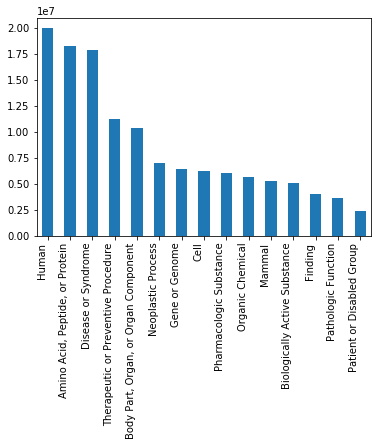

In [17]:
all_sems = sub_sems+obj_sems
all_sems.index  = [abbv_to_type.get(x, x) for x in all_sems.index]

all_sems = all_sems.dropna()
all_sems = all_sems.sort_values(ascending=False)
all_sems[:15].plot(kind='bar');

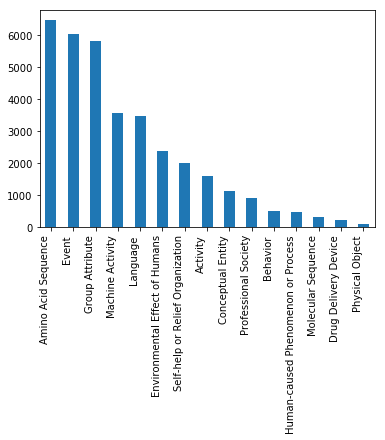

In [18]:
all_sems[-15:].plot(kind='bar');

In [19]:
sub_super = sem_df['SUBJECT_SEMTYPE'].apply(lambda x: abbv_to_super.get(x, x))
obj_super = sem_df['OBJECT_SEMTYPE'].apply(lambda x: abbv_to_super.get(x, x))

In [20]:
sub_super_counts = sub_super.value_counts()
obj_super_counts = obj_super.value_counts()

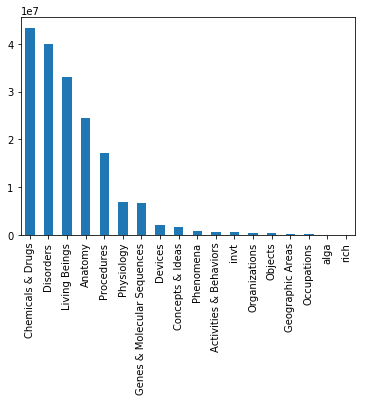

In [21]:
all_super = sub_super_counts + obj_super_counts
all_super = all_super.dropna()
all_super = all_super.sort_values(ascending=False)

all_super.plot(kind='bar');

In [18]:
# Get predicate abbreviations

print(len(preds.index))
p_abv = {}
for p in preds.index:
    pspl = p.split('_')
    
    p_abv[p] = ''.join([c[0].lower() for c in pspl])
print(len(p_abv))

68
68


In [31]:
# get abbreviations for semtypes
super_sems = set(abbv_to_super.values())

len(super_sems)
super_sems

{'Activities & Behaviors',
 'Anatomy',
 'Chemicals & Drugs',
 'Concepts & Ideas',
 'Devices',
 'Disorders',
 'Genes & Molecular Sequences',
 'Geographic Areas',
 'Living Beings',
 'Objects',
 'Occupations',
 'Organizations',
 'Phenomena',
 'Physiology',
 'Procedures'}

In [32]:
# Run these by hand as there are few, and some don't lend themselves well to auto-generation
sem_abv = {
 'Activities & Behaviors': 'AB',
 'Anatomy': 'A',
 'Chemicals & Drugs': 'C',
 'Concepts & Ideas': 'CI',
 'Devices': 'DV',
 'Disorders': 'D',
 'Genes & Molecular Sequences': 'G',
 'Geographic Areas': 'GA',
 'Living Beings': 'LB',
 'Objects': 'OB',
 'Occupations': 'OC',
 'Organizations': 'OR',
 'Phenomena': 'PH',
 'Physiology': 'PS',
 'Procedures': 'PR'
}

In [33]:
# Make a nodes csv

snodes = pd.DataFrame()
onodes = pd.DataFrame()


snodes[':ID'] = sem_df['SUBJECT_CUI']
snodes['name'] = sem_df['SUBJECT_NAME']
snodes[':LABEL'] = sem_df['SUBJECT_SEMTYPE'].apply(lambda x: abbv_to_super.get(x))

onodes[':ID'] = sem_df['OBJECT_CUI']
onodes['name'] = sem_df['OBJECT_NAME']
onodes[':LABEL'] = sem_df['OBJECT_SEMTYPE'].apply(lambda x: abbv_to_super.get(x))


nodes = pd.concat([snodes, onodes])
nodes.drop_duplicates(inplace=True)

print(nodes.shape)
nodes.head()

(341122, 3)


,:ID,name,:LABEL
0,C0026879,Mutagens,Chemicals & Drugs
1,C0017725,Glucose,Chemicals & Drugs
2,C0006147,Breast Feeding,Physiology
3,C0279494,Oestrogen therapy,Procedures
4,C0232338,Blood flow,Physiology


In [34]:
# Make a mapper from SEMTYPE to sem abbrev
kind_map = {}

for k, v in abbv_to_super.items():
    kind_map[k] = sem_abv[v]

In [36]:
id_to_type = nodes.set_index(':ID')[':LABEL'].to_dict()
id_to_type_abbv = {k: sem_abv.get(v) for k, v in id_to_type.items()}

In [41]:
edges = pd.DataFrame()

edges[':START_ID'] = sem_df['SUBJECT_CUI']
edges[':END_ID'] = sem_df['OBJECT_CUI']
edges[':TYPE'] = sem_df['PREDICATE']

edges[':TYPE'] = (edges[':TYPE'] + '_' + edges[':START_ID'].apply(lambda x: id_to_type_abbv.get(x,x)) 
                    + edges[':TYPE'].apply(lambda x: p_abv.get(x,x))
                    + edges[':START_ID'].apply(lambda x: id_to_type_abbv.get(x,x)))

print(edges.shape)
edges.head()

(89173359, 3)


,:START_ID,:END_ID,:TYPE
0,C0026879,C0220806,ISA_CiC
1,C0017725,C0022378,PART_OF_CpoC
2,C0006147,C0020114,PROCESS_OF_PSpoPS
3,C0279494,C0043210,TREATS_PRtPR
4,C0232338,C0012984,PROCESS_OF_PSpoPS


In [43]:
(edges[':TYPE'].value_counts() > (.0001 * len(edges)) ).sum()

155

In [45]:
nodes.to_csv('../data/nodes.csv')
edges.to_csv('../data/edges.csv')